<a href="https://colab.research.google.com/github/pirumba/deeplearning/blob/main/Chest_opacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import PIL.Image
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Connecting Google colab to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Set

In [3]:
#import pathlib
dataset1 = "/content/drive/MyDrive/deep_learning_project1/dataset1/known_images"
train_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2, subset="training", seed=123, image_size=(100,100),batch_size=30)


Found 715 files belonging to 2 classes.
Using 572 files for training.


Explore the data

Verifying Data class names

In [4]:
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


Verifying images to be used for validation

In [5]:
valid_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2,subset="validation", seed=123, image_size=(100, 100), batch_size=30)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


viewing sample images of the train data

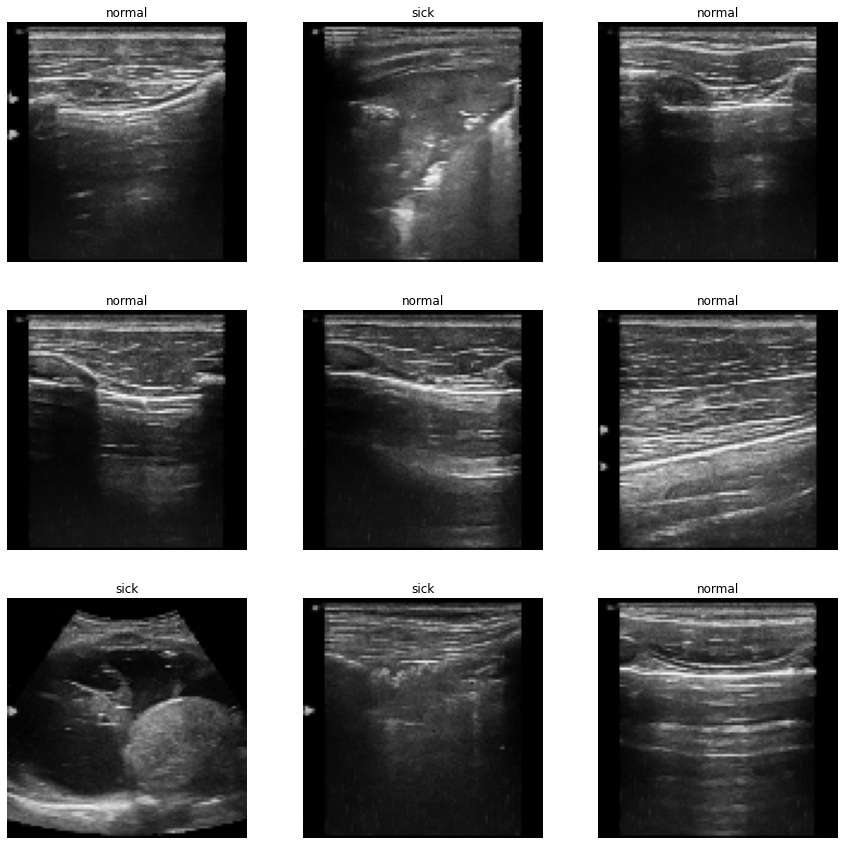

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, lebels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[lebels[i]])
    plt.axis("off")

checking the shape of the images

In [7]:
for image_batch, lebels_batch in train_ds:
  print(image_batch.shape)
  print(lebels_batch.shape)
  break

(30, 100, 100, 3)
(30,)


# Preprocess the data

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

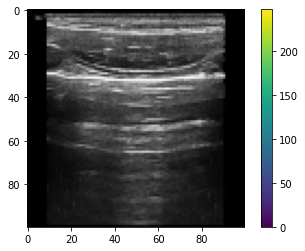

In [8]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(images[i].numpy().astype("uint8"))
#plt.imshow(train_ds[0])
plt.colorbar()
plt.grid(False)
plt.show()

Autotunning the training dataset and validation dataset

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


Normalizing datasets

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_train_ds))
first_image = image_batch[3]
print(np.min(first_image), np.max(first_image))



0.0 0.9310099


In [12]:
normalized_valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_valid_ds))
first_image = image_batch[2]
print(np.min(first_image), np.max(first_image))

0.0 0.9560125


Creating the Model

In [13]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

Compiling the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Printing model summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

Epoching

In [16]:
epochs=15
history = model.fit(
normalized_valid_ds, 
validation_data =normalized_valid_ds,
epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 4s 486ms/step - loss: 0.6943 - accuracy: 0.4336 - val_loss: 0.6933 - val_accuracy: 0.4825
Epoch 2/15
5/5 [==============================] - 2s 434ms/step - loss: 0.6934 - accuracy: 0.4476 - val_loss: 0.6931 - val_accuracy: 0.5175
Epoch 3/15
5/5 [==============================] - 2s 431ms/step - loss: 0.6931 - accuracy: 0.5175 - val_loss: 0.6931 - val_accuracy: 0.5175
Epoch 4/15
5/5 [==============================] - 2s 458ms/step - loss: 0.6931 - accuracy: 0.5175 - val_loss: 0.6930 - val_accuracy: 0.5175
Epoch 5/15
5/5 [==============================] - 2s 452ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6930 - val_accuracy: 0.5175
Epoch 6/15
5/5 [==============================] - 2s 451ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6929 - val_accuracy: 0.5175
Epoch 7/15
5/5 [==============================] - 2s 434ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6929 - val_accuracy: 0.5175
Epoch 8/15
5/5 [====

Printing Training  accuracy and loss curves

In [17]:
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs_range =range(epochs)
#plt.figure(figsize=(8, 8))

#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label = 'Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc = 'lower right')
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label = 'Validation Loss')
#plt.legend(loc = 'upper right')
#plt.title('Training and Validation loss')
#plt.show()

Training Loss Vs Validation loss curves

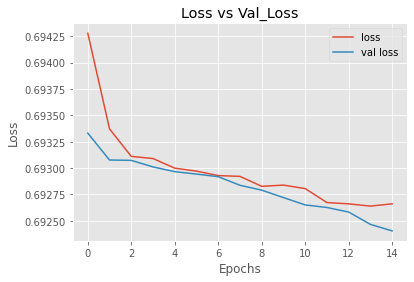

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Training Accuracy Vs Validation Accuracy curves

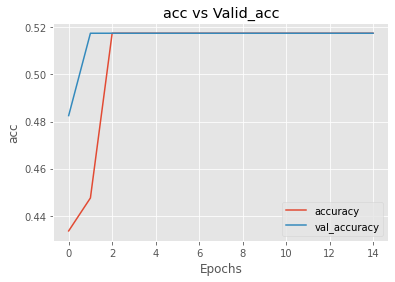

In [19]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [20]:
valid_loss, valid_acc = model. evaluate(normalized_valid_ds)
print(valid_loss)
print(valid_acc)

training_loss, training_acc = model.evaluate(normalized_valid_ds)
print(training_loss)
print(training_acc)

5/5 [==============================] - 1s 96ms/step - loss: 0.6924 - accuracy: 0.5175
0.6924046277999878
0.5174825191497803
5/5 [==============================] - 0s 91ms/step - loss: 0.6924 - accuracy: 0.5175
0.6924046874046326
0.5174825191497803


Data Augmentation to reduce *overfitting*

In [21]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal",
                       input_shape=(100,
                                   100,
                                   3)),
     layers.RandomRotation(0.2),
     layers.RandomZoom(0.2),
     ]
)

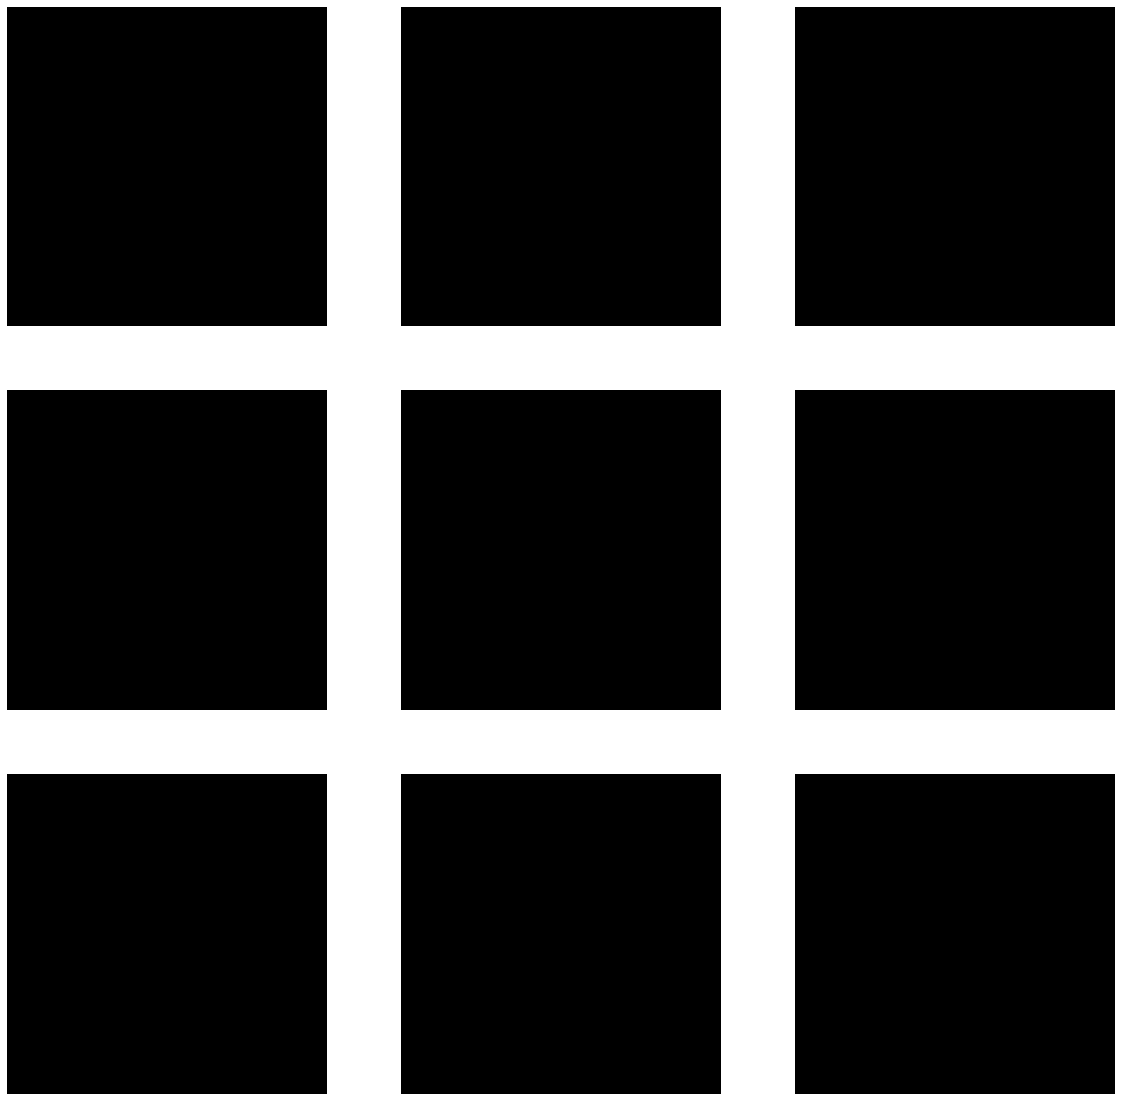

In [22]:
plt.figure(figsize=(20, 20))
for images, _ in normalized_train_ds.take(1):
  for i in range(9):
    augmented_images=data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

creating another model layer

In [23]:
num_classes = len(class_names)
model2 = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

compile the bmodel2

In [24]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model summary

In [25]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 64)       

In [26]:
epochs=15
history2 = model.fit(
normalized_valid_ds, 
validation_data =normalized_valid_ds,
epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 2s 452ms/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6921 - val_accuracy: 0.5175
Epoch 2/15
5/5 [==============================] - 2s 434ms/step - loss: 0.6920 - accuracy: 0.5175 - val_loss: 0.6913 - val_accuracy: 0.5175
Epoch 3/15
5/5 [==============================] - 2s 457ms/step - loss: 0.6910 - accuracy: 0.5175 - val_loss: 0.6896 - val_accuracy: 0.5175
Epoch 4/15
5/5 [==============================] - 2s 444ms/step - loss: 0.6882 - accuracy: 0.5175 - val_loss: 0.6863 - val_accuracy: 0.5175
Epoch 5/15
5/5 [==============================] - 2s 434ms/step - loss: 0.6822 - accuracy: 0.5175 - val_loss: 0.6711 - val_accuracy: 0.5315
Epoch 6/15
5/5 [==============================] - 2s 435ms/step - loss: 0.6544 - accuracy: 0.5804 - val_loss: 0.6380 - val_accuracy: 0.5804
Epoch 7/15
5/5 [==============================] - 2s 431ms/step - loss: 0.6104 - accuracy: 0.6364 - val_loss: 0.5329 - val_accuracy: 0.7902
Epoch 8/15
5/5 [====

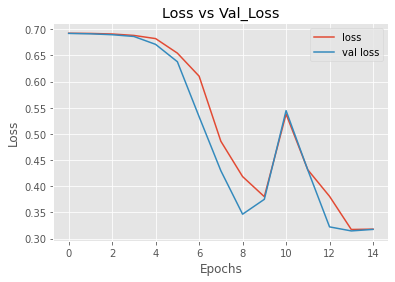

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

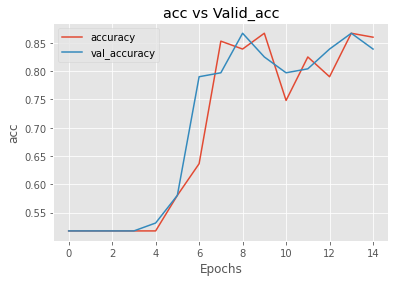

In [28]:
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

Dropout technique for reducing overfiting



In [29]:
model3 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])


In [30]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

In [32]:
epochs=10
history3 = model3.fit(
normalized_valid_ds, 
validation_data =normalized_valid_ds,
epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 4s 561ms/step - loss: 0.6934 - accuracy: 0.5105 - val_loss: 0.6927 - val_accuracy: 0.5175
Epoch 2/10
5/5 [==============================] - 2s 494ms/step - loss: 0.6936 - accuracy: 0.5175 - val_loss: 0.6927 - val_accuracy: 0.5175
Epoch 3/10
5/5 [==============================] - 2s 481ms/step - loss: 0.6937 - accuracy: 0.5175 - val_loss: 0.6924 - val_accuracy: 0.5175
Epoch 4/10
5/5 [==============================] - 2s 478ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6926 - val_accuracy: 0.5175
Epoch 5/10
5/5 [==============================] - 2s 488ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6924 - val_accuracy: 0.5175
Epoch 6/10
5/5 [==============================] - 2s 488ms/step - loss: 0.6927 - accuracy: 0.5175 - val_loss: 0.6920 - val_accuracy: 0.5175
Epoch 7/10
5/5 [==============================] - 2s 484ms/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6916 - val_accuracy: 0.5175
Epoch 8/10
5/5 [====

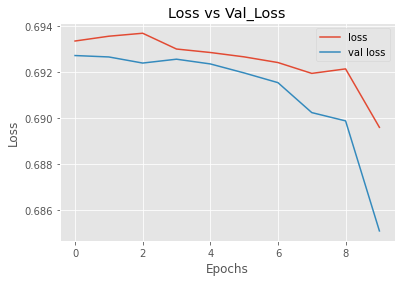

In [33]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

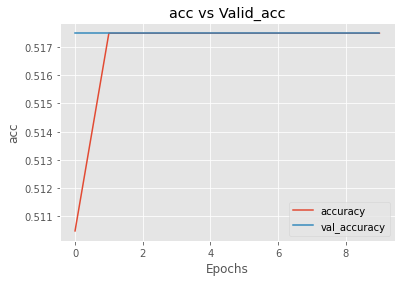

In [34]:
plt.plot(history3.history['accuracy'], label = 'accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

Testing

In [35]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1/normal/normal_0.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence


In [36]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1/unknown_images/45.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence


In [37]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1/unknown_images/13.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)


This image most likely belongs to normal with a 100.00 percent confidence


In [38]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset2/images/sick_eff21.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence


Found 766 files belonging to 3 classes.
predictions:
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0]
Labels:
 [1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 2 0 1 2 0 1 1 2 1 0 1 0 1 0 1
 1 0 0 1 0 1 1 1 0 1 1 2 1]


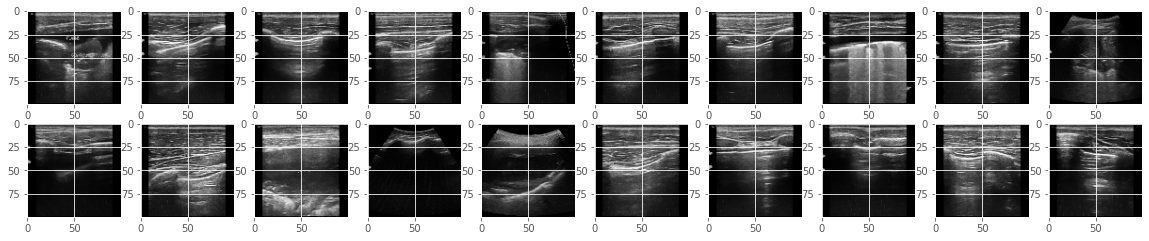

In [39]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project/dataset1"
test_ds = tf.keras.utils.image_dataset_from_directory(dataset_1, image_size=(100, 100), batch_size=50)

image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))

In [40]:
dataset_2 = "/content/drive/MyDrive/deep_learning_project/dataset2"
test_ds2 = tf.keras.utils.image_dataset_from_directory(dataset_2, image_size=(100, 100), batch_size=20)


Found 224 files belonging to 1 classes.


In [41]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds2 = test_ds2.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [42]:
normalization_layer = layers.Rescaling(1./255)

In [43]:
normalized_ds2 = test_ds2.map(lambda x, y: (normalization_layer(x), y))
image_batch, label_batch = next(iter(normalized_ds2))
first_image = image_batch[3]

print(np.min(first_image), np.max(first_image))

0.0 0.95272547


In [44]:
dataset2 = "/content/drive/MyDrive/deep_learning_project/dataset2"
test_ds2 = tf.keras.utils.image_dataset_from_directory(dataset_1, image_size=(100, 100), batch_size=20)





Found 766 files belonging to 3 classes.


predictions:
 [0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0]
Labels:
 [1 0 1 1 1 1 1 0 1 2 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 2 1 1 1 2 0 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 1 1]


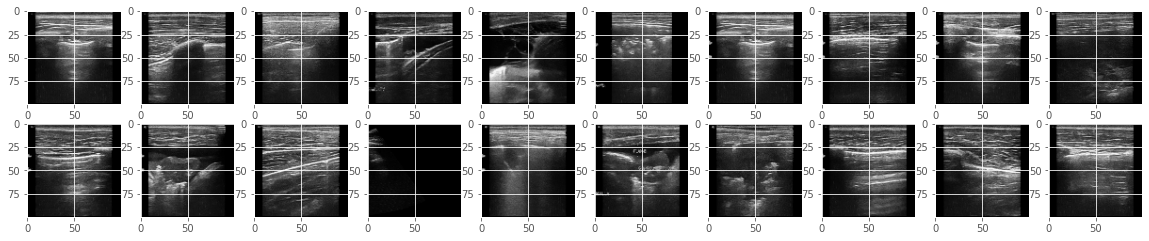

In [45]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))

In [46]:
valid_loss, valid_acc = model. evaluate(valid_ds)
print(valid_loss)
print(valid_acc)

training_loss, training_acc = model.evaluate(valid_ds)
print(training_loss)
print(training_acc)

5/5 [==============================] - 1s 95ms/step - loss: 115.3155 - accuracy: 0.7622
115.31554412841797
0.7622377872467041
5/5 [==============================] - 0s 94ms/step - loss: 115.3155 - accuracy: 0.7622
115.31554412841797
0.7622377872467041


In [47]:
dataset_2 = "/content/drive/MyDrive/deep_learning_project/dataset2/images/sick_eif48.png"

img = tf.keras.utils.load_img(dataset_2, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence


In [48]:
import pandas as pd
import numpy as np
DF = pd.DataFrame(predictions)
DF.to_csv("image_results.csv")